In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

from gproc.generative import sample_at_x
from gproc.plotting import contour_2d
from gproc.kernels import *

## 1D Example

In [5]:
N = 50

x = np.random.uniform(-1, 1, N).reshape(-1, 1) # Reshape to N x 1 matrix
true_lengthscale = 0.1
true_variance = 1.4
kernel = SquaredExponential(lengthscale = true_lengthscale, variance = true_variance)

y, prob_y, f = sample_at_x(x, kernel)

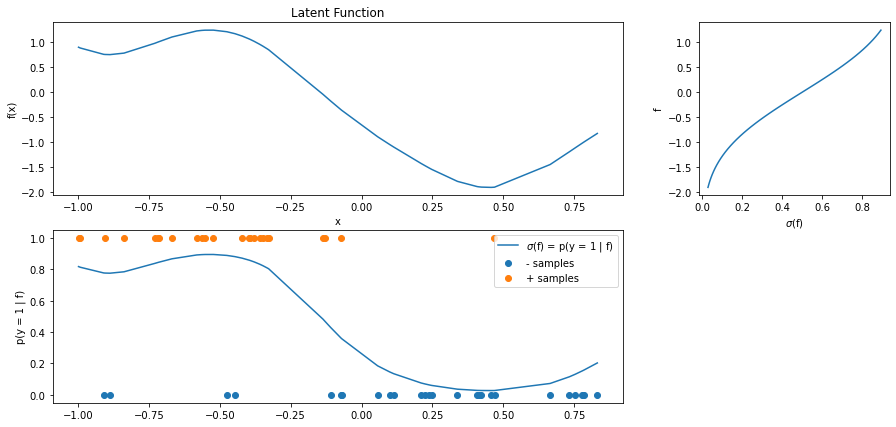

In [6]:
sort_ix = np.argsort(x.reshape(-1))
sorted_x = x.reshape(-1)[sort_ix]

fig, axarr = plt.subplots(2, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [3, 1]})

axarr[0, 0].plot(sorted_x, f[sort_ix])
axarr[0, 0].set_xlabel('x')
axarr[0, 0].set_ylabel('f(x)')
axarr[0, 0].set_title('Latent Function')

f_domain = np.linspace(np.min(f), np.max(f), 50)

axarr[0, 1].plot(norm.cdf(f_domain), f_domain)
axarr[0, 1].set_ylabel('f')
axarr[0, 1].set_xlabel('$\sigma$(f)')

axarr[1, 0].plot(sorted_x, prob_y[sort_ix], label='$\sigma$(f) = p(y = 1 | f)')
plot_y = y.copy()[sort_ix]
plot_y[plot_y == -1] = 0
axarr[1, 0].scatter(sorted_x[plot_y == 0], plot_y[plot_y == 0], label='- samples')
axarr[1, 0].scatter(sorted_x[plot_y == 1], plot_y[plot_y == 1], label='+ samples')
axarr[1, 0].legend()
axarr[1, 0].set_ylabel('p(y = 1 | f)')

axarr[1, 1].axis('off')
plt.show()

## 2D Example

In [7]:
N = 50

x = np.random.uniform(-1, 1, N * 2).reshape(-1, 2) # Reshape to N x 2 matrix
true_lengthscale = 1
true_variance = 3
kernel = SquaredExponential(lengthscale = true_lengthscale, variance = true_variance)

y, prob_y, f = sample_at_x(x, kernel)


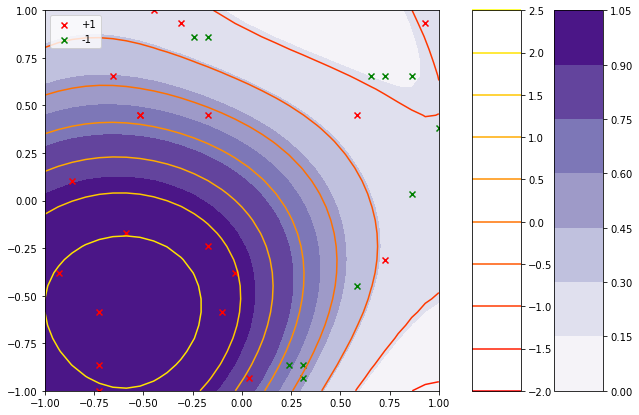

In [9]:
sampler = lambda x: sample_at_x(x, kernel)

fig, axarr = plt.subplots(1, 3, figsize=(10, 7), gridspec_kw={'width_ratios': [8, 1, 1]})

f_contour, py_contour = contour_2d(axarr[0], sampler, N=30)
fig.colorbar(f_contour, cax=axarr[1], orientation='vertical')
fig.colorbar(py_contour, cax=axarr[2], orientation='vertical')

axarr[0].legend()
plt.show()